# **Lesson 12**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten, Conv2D, MaxPooling2D
from PIL import Image
import os

In [2]:
# plot parameters
import sys
sys.path.append('./../Libraries/')
import plt_params
%matplotlib inline

In [3]:
# random seed
seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

## MNIST with Keras

The goal of exercise 12 is to use deep neural network models, implemented in the Keras python package, to recognize and distinguish between the ten handwritten digits (0-9).

The MNIST dataset comprises $70000$ handwritten digits, each of which comes in a square image, divided into a $28\times 28$ pixel grid. Every pixel can take on $256$ gradation of the gray color, interpolating between white and black, and hence each data point assumes any value in the set $\{0,1,\dots,255\}$. Since there are $10$ categories in the problem, corresponding to the ten digits, this problem represents a generic **classification task**. 

# Exercise 12.1

Create your DNN choosing an adeuqate value for the number of epochs. Try to use at least two other optimizers, different from SGD: watch to accuracy and loss for training and validation data and comment on the performances.

In [4]:
rows, cols = 28, 28
n_classes = 10

In [5]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('Before reshaping:')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print()

# reshape data, it could depend on Keras backend
x_train = x_train.reshape(x_train.shape[0], rows*cols)
x_test = x_test.reshape(x_test.shape[0], rows*cols)
print('After reshaping:')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print()

# cast to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# rescale data in interval [0,1]
x_train /= 255
x_test /= 255

print('Before conversion to categorical:')
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
print()

# convert class vectors to binary class matrices, for use with categorical_crossentropy
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)
print('After conversion to categorical:')
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


Before reshaping:
x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)

After reshaping:
x_train shape: (60000, 784)
x_test shape: (10000, 784)

Before conversion to categorical:
y_train shape: (60000,)
y_test shape: (10000,)

After conversion to categorical:
y_train shape: (60000, 10)
y_test shape: (10000, 10)


In [6]:
def create_DNN():
   # instantiate model
   model = Sequential()
   # add a dense all-to-all relu layer
   model.add(Dense(512, input_shape=(rows*cols,), activation='relu'))
   # add a dense all-to-all relu layer
   model.add(Dense(128, activation='relu'))
   # apply dropout with rate 0.5
   model.add(Dropout(0.5))
   # soft-max layer
   model.add(Dense(n_classes, activation='softmax'))
   
   return model


def compile_model(opt = 'SGD'):
   # create the model
   model = create_DNN()
   # compile the model
   model.compile( loss=keras.losses.categorical_crossentropy,
                  optimizer=opt,
                  metrics=['acc'])
   return model


def training(data, opt = 'SGD', epochs = 100) :
   # create and compile the model
   model = compile_model(opt)
   history = model.fit(data[0], data[1], batch_size=32, epochs=epochs, verbose=1, validation_data=(data[2], data[3]))

   return model, history

In [7]:
# training hyperparameters
optimizers = ['SGD', 'Adam', 'NAdam', 'Adagrad', 'RMSProp']
epochs = 100
data = [x_train, y_train, x_test, y_test]

In [8]:
for i in range(4) :
    print(data[i].shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [9]:
# storing models and histories
models = []
histories = []

# training
for opt in optimizers :
    mod, his = training(data, opt, epochs)
    models.append(mod)
    histories.append(his)

Epoch 1/100
1875/1875 [==============================] - 29s 15ms/step - loss: 0.7279 - acc: 0.7872 - val_loss: 0.3057 - val_acc: 0.9167
Epoch 2/100
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3631 - acc: 0.8962 - val_loss: 0.2339 - val_acc: 0.9339
Epoch 3/100
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2926 - acc: 0.9168 - val_loss: 0.1966 - val_acc: 0.9440
Epoch 4/100
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2514 - acc: 0.9276 - val_loss: 0.1728 - val_acc: 0.9487
Epoch 5/100
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2198 - acc: 0.9369 - val_loss: 0.1580 - val_acc: 0.9535
Epoch 6/100
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1968 - acc: 0.9430 - val_loss: 0.1404 - val_acc: 0.9585
Epoch 7/100
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1802 - acc: 0.9484 - val_loss: 0.1277 - val_acc: 0.9612
Epoch 8/100
1875/1875 [==================

In [10]:
# saving models and histories
models_DNN = models
histories_DNN = histories
for m, mod in enumerate(models_DNN) :
    mod.save('DNN/Model_with_' + optimizers[m])

import json
for h, his in enumerate(histories_DNN) :
    with open('DNN/History_with_' + optimizers[h] + '.json', 'w') as f :
        json.dump(his.history, f)


INFO:tensorflow:Assets written to: DNN/Model_with_SGD/assets


INFO:tensorflow:Assets written to: DNN/Model_with_SGD/assets


INFO:tensorflow:Assets written to: DNN/Model_with_Adam/assets


INFO:tensorflow:Assets written to: DNN/Model_with_Adam/assets


INFO:tensorflow:Assets written to: DNN/Model_with_NAdam/assets


INFO:tensorflow:Assets written to: DNN/Model_with_NAdam/assets


INFO:tensorflow:Assets written to: DNN/Model_with_Adagrad/assets


INFO:tensorflow:Assets written to: DNN/Model_with_Adagrad/assets


INFO:tensorflow:Assets written to: DNN/Model_with_RMSProp/assets


INFO:tensorflow:Assets written to: DNN/Model_with_RMSProp/assets


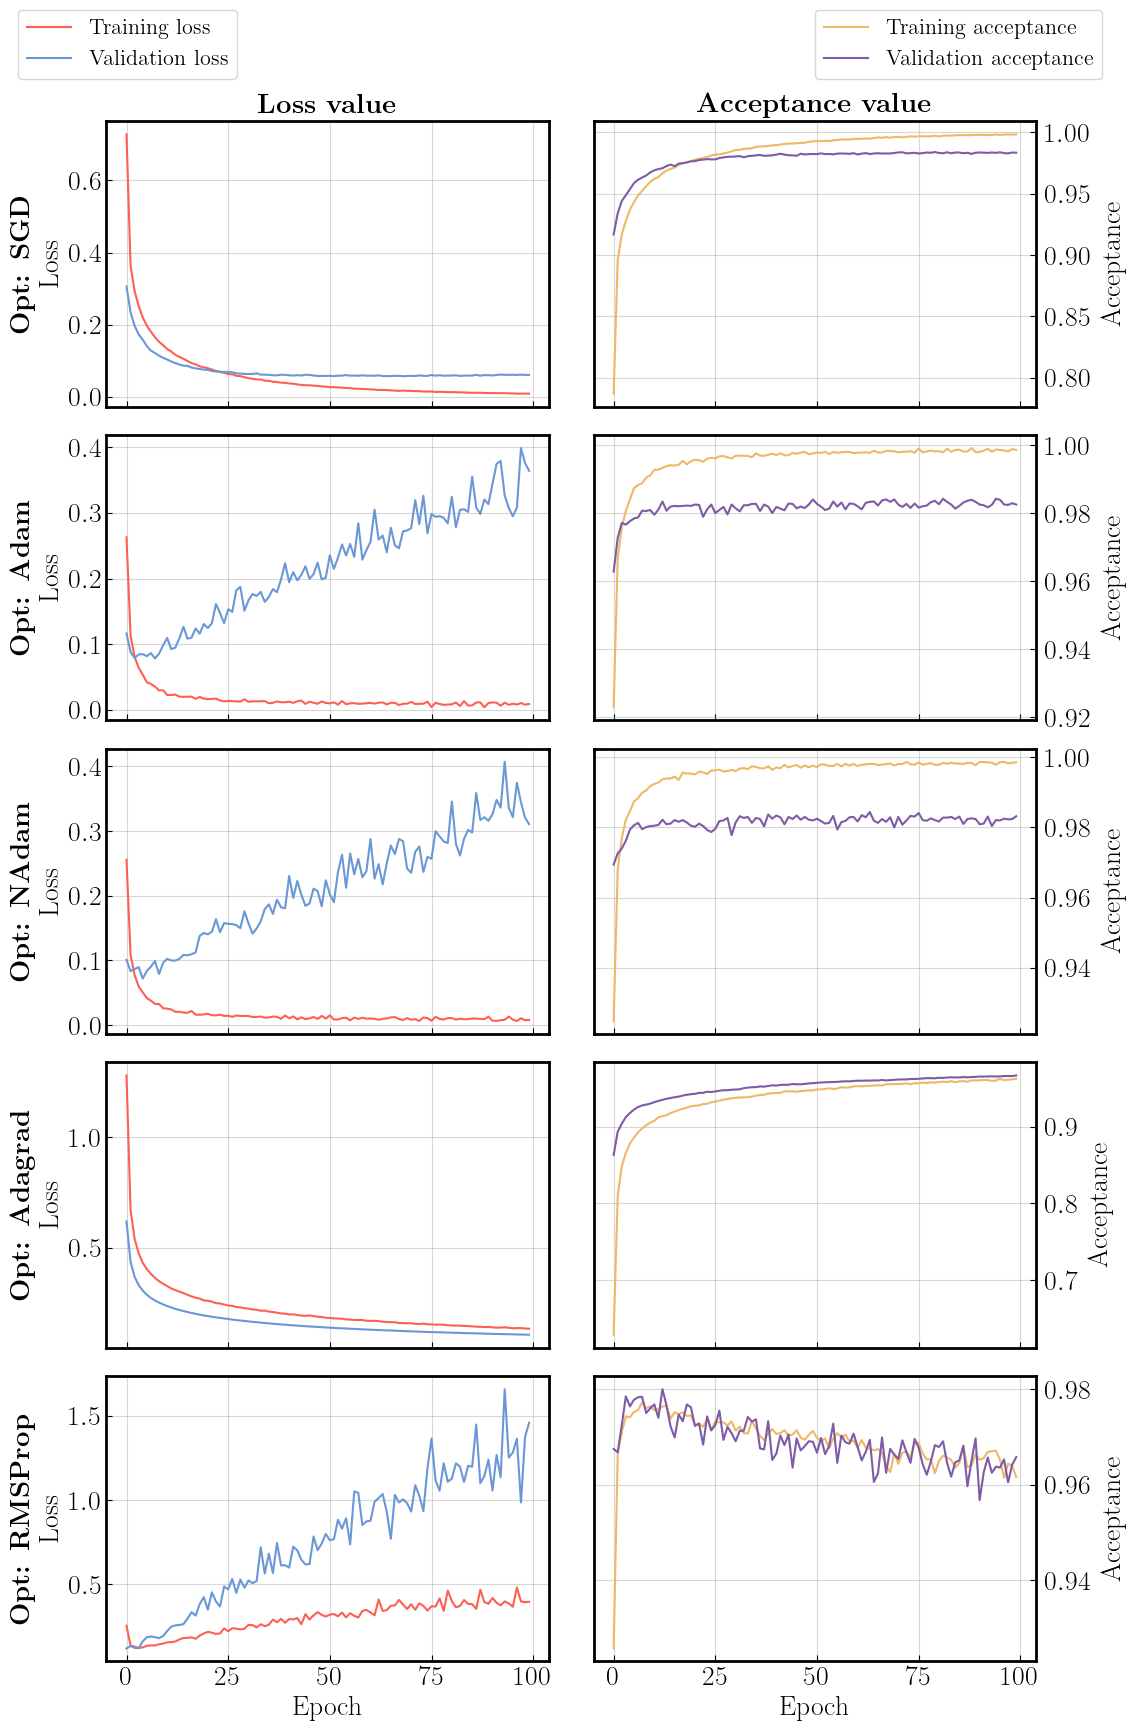

In [11]:
fig, axs = plt.subplots(len(optimizers), 2, figsize=(12,20), gridspec_kw={'hspace': 0.1, 'wspace': 0.1})

for o, opt in enumerate(optimizers) :
    axs[o,0].plot(histories[o].history['loss'], c='#FE5F55', label='Training loss')
    axs[o,0].plot(histories[o].history['val_loss'], c='#6A97D6', label='Validation loss')
    axs[o,1].plot(histories[o].history['acc'], c='#EEB868', label='Training acceptance')
    axs[o,1].plot(histories[o].history['val_acc'], c='#7D5BA6', label='Validation acceptance')

    axs[o,0].set_ylabel(r'\textbf{Opt: ' +opt+ '} \nLoss')
    axs[o,1].set_ylabel('Acceptance', labelpad=8)
    axs[o,1].yaxis.set_label_position('right')
    axs[o,1].yaxis.set_tick_params(pad=6, left=False, right=True, labelleft=False, labelright=True)
    if(o != len(optimizers)-1) :
        axs[o,0].set_xticklabels([])
        axs[o,1].set_xticklabels([])

axs[0,0].set_title(r'\textbf{Loss value}')
axs[0,1].set_title(r'\textbf{Acceptance value}')
axs[0,0].legend(loc=(-0.2,1.15), fontsize=16)
axs[0,1].legend(loc=(0.5,1.15), fontsize=16)
axs[-1,0].set_xlabel('Epoch')
axs[-1,1].set_xlabel('Epoch')

plt.show()

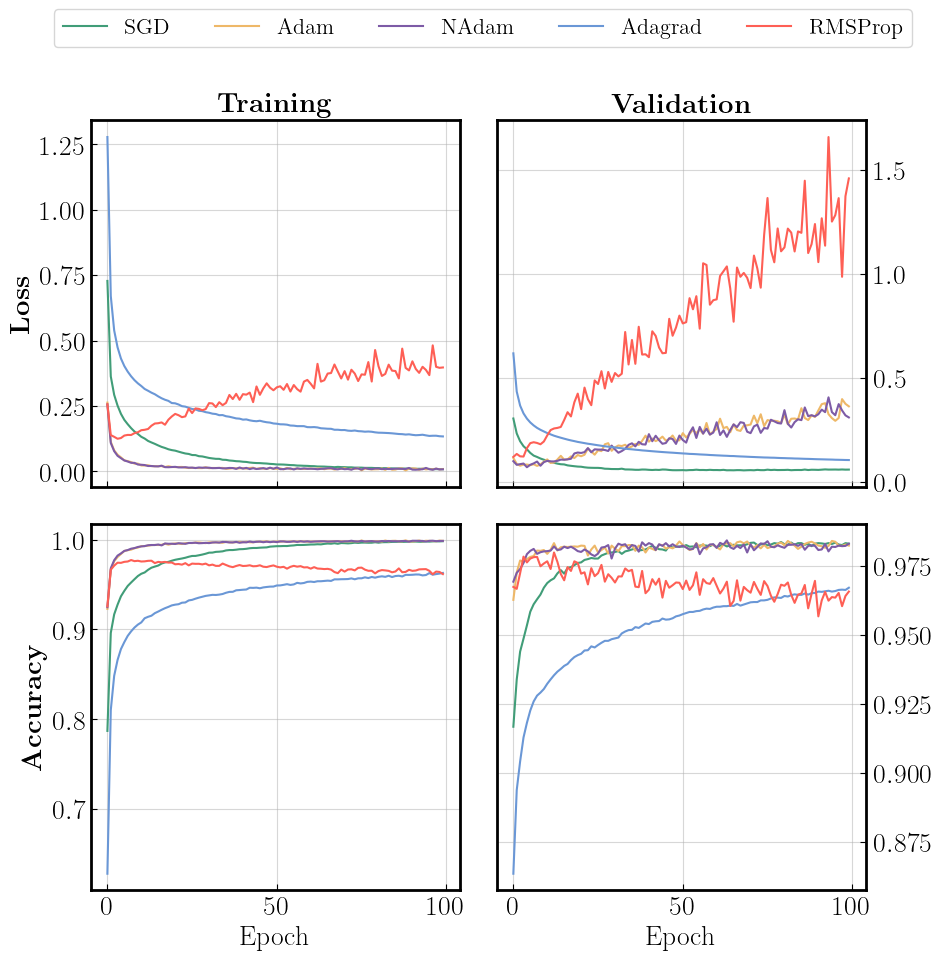

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(10,10), gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
colors = ['#419D78', '#EEB868', '#7D5BA6', '#6A97D6', '#FE5F55']

for h, his in enumerate(histories) :
    axs[0,0].plot(his.history['loss'], c=colors[h], label=optimizers[h])
    axs[0,1].plot(his.history['val_loss'], c=colors[h], label=optimizers[h])
    axs[1,0].plot(his.history['acc'], c=colors[h], label=optimizers[h])
    axs[1,1].plot(his.history['val_acc'], c=colors[h], label=optimizers[h])

axs[1,0].set_xlabel('Epoch')
axs[1,1].set_xlabel('Epoch')
axs[0,0].set_ylabel(r'\textbf{Loss}')
axs[1,0].set_ylabel(r'\textbf{Accuracy}')
axs[0,0].set_title(r'\textbf{Training}')
axs[0,1].set_title(r'\textbf{Validation}')

axs[0,0].set_xticklabels([])
axs[0,1].set_xticklabels([])
axs[0,1].yaxis.set_label_position('right')
axs[0,1].yaxis.set_tick_params(pad=6, left=False, right=True, labelleft=False, labelright=True)
axs[1,1].yaxis.set_label_position('right')
axs[1,1].yaxis.set_tick_params(pad=6, left=False, right=True, labelleft=False, labelright=True)
axs[0,0].legend(loc=(-0.1,1.2), fontsize=16, ncol=len(optimizers))

plt.show()

313/313 [==============================] - 0s 1ms/step


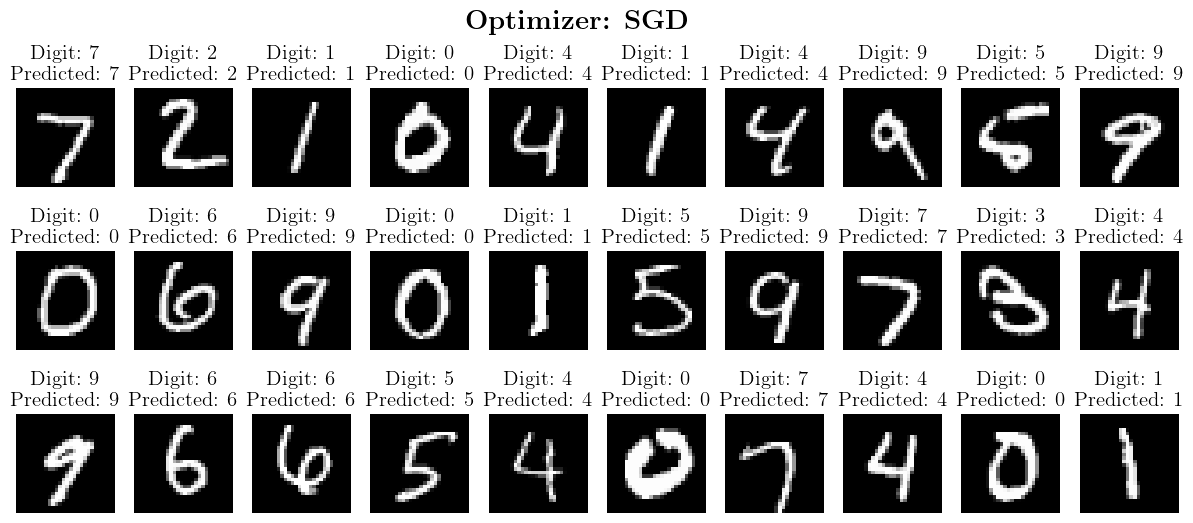

313/313 [==============================] - 0s 1ms/step


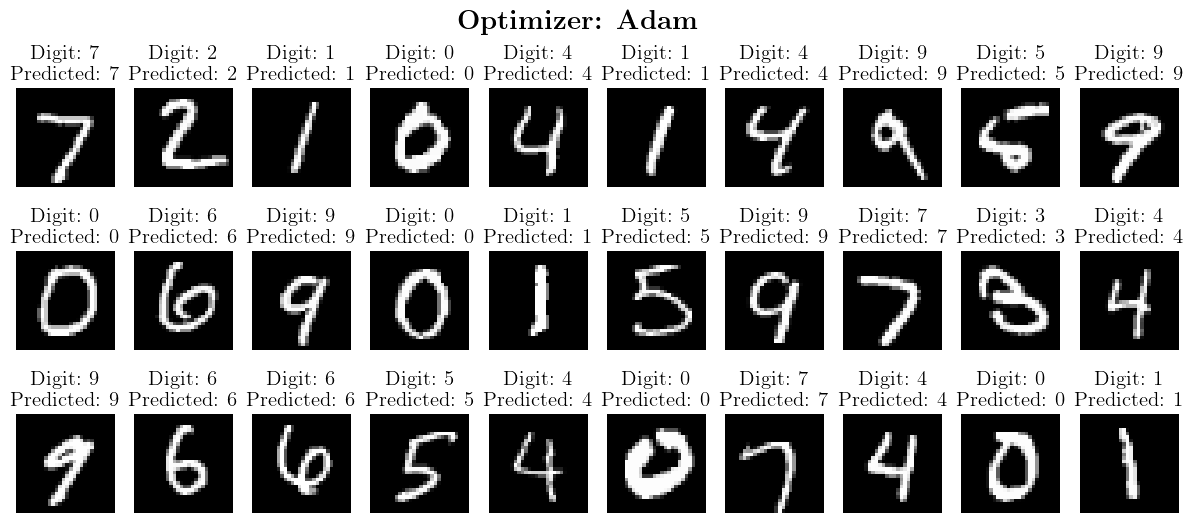

313/313 [==============================] - 1s 2ms/step


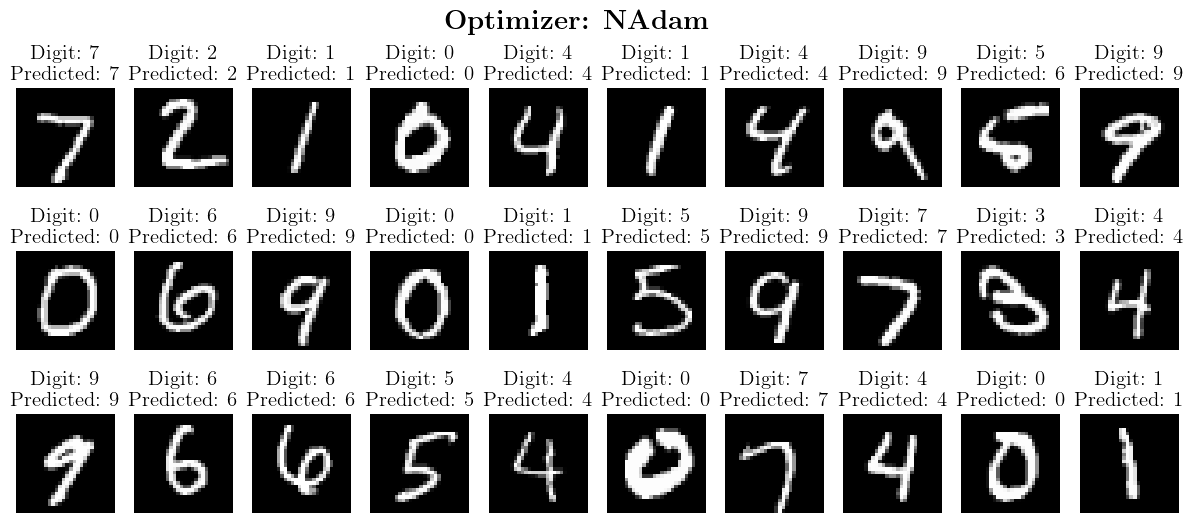

313/313 [==============================] - 0s 1ms/step


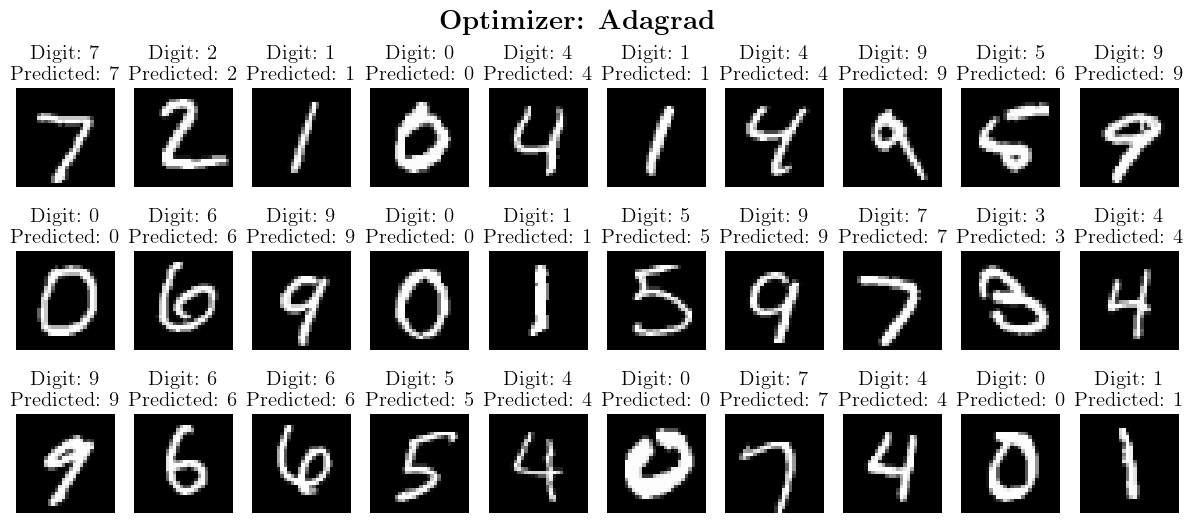

313/313 [==============================] - 0s 1ms/step


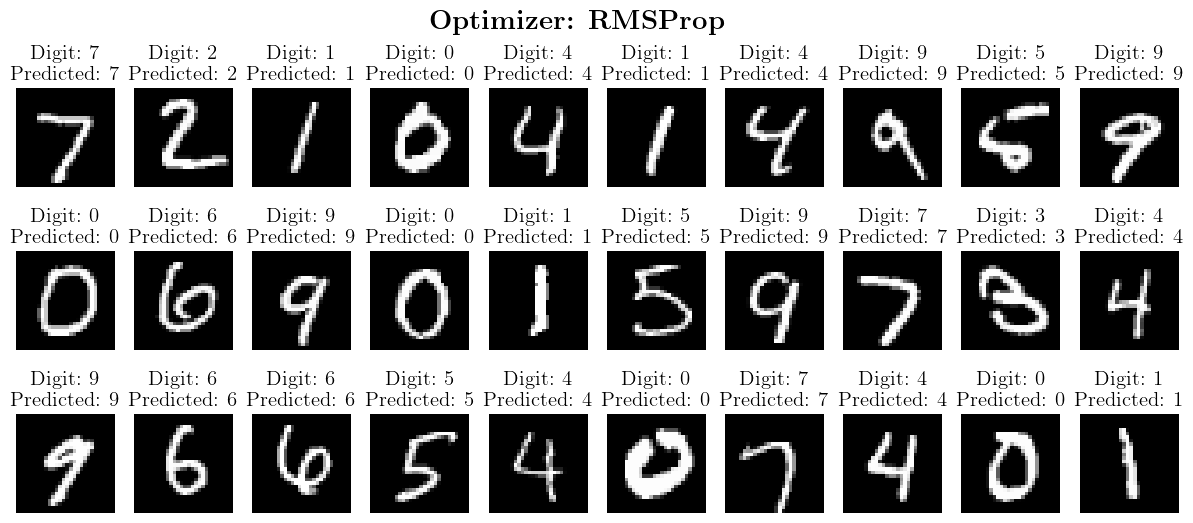

In [13]:
# plot predictions
x_test_pred = x_test
x_test_plot = x_test.reshape((x_test.shape[0], rows, cols, 1))
predictions = []

for o, opt in enumerate(optimizers) :
    plt.figure(figsize=(15,6))
    predictions.append(models[o].predict(x_test_pred))
    for i in range(30) :
        ax = plt.subplot(3, 10, i + 1)    
        plt.imshow(x_test_plot[i, :, :, 0], cmap='gray')    
        plt.title('Digit: ' +str(np.argmax(y_test[i]))+ '\nPredicted: ' +str(np.argmax(predictions[o][i])), fontsize=15)
        plt.axis('off') 
    plt.suptitle(r'\textbf{Optimizer: ' +opt+ '}')
    plt.show()

# Exercise 12.2

Change the architecture of your DNN using convolutional layers. Use `Conv2D`, `MaxPooling2D`, `Dropout`, but also do not forget `Flatten`, a standard `Dense` layer and `soft-max` in the end. I have merged step 2 and 3 in the following definition of `create_CNN()` that **you should complete**:

In [14]:
# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, rows, cols)
    x_test = x_test.reshape(x_test.shape[0], 1, rows, cols)
    input_shape = (1, rows, cols)
else:
    x_train = x_train.reshape(x_train.shape[0], rows, cols, 1)
    x_test = x_test.reshape(x_test.shape[0], rows, cols, 1)
    input_shape = (rows, cols, 1)

print('After reshape:')
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print()
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

After reshape:
x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [15]:
def create_CNN():
    
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(n_classes, kernel_size=(5, 5), activation='elu', input_shape=input_shape)) # 24 x 24 x 10
    # second convolution with 8 filters
    #model.add(Conv2D(8, kernel_size=(5, 5), activation='elu', input_shape=input_shape))         # 20 x 20 x 8
    # MaxPooling to coarse-grain the image
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))                                   # 12 x 12 x 10
    # second convolution with 16 filters
    model.add(Conv2D(16, kernel_size=(5, 5), activation='elu', input_shape=input_shape))        # 8 x 8 x 16
    # MaxPooling to coarse-grain the image
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))                                   # 4 x 4 x 16
    # Flatten
    model.add(Flatten())
    # Dense layers
    model.add(Dense(256, activation='elu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='elu'))
    model.add(Dense(n_classes, activation='softmax'))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=['acc'])
    
    return model

In [16]:
# training hyperparameters
epochs = 15

In [17]:
# training the model
CNN = create_CNN()
history = CNN.fit(x_train, y_train, batch_size=32, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.4590 - acc: 0.8598 - val_loss: 0.1309 - val_acc: 0.9617
Epoch 2/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1581 - acc: 0.9522 - val_loss: 0.0905 - val_acc: 0.9719
Epoch 3/15
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1192 - acc: 0.9633 - val_loss: 0.0672 - val_acc: 0.9795
Epoch 4/15
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1002 - acc: 0.9697 - val_loss: 0.0583 - val_acc: 0.9814
Epoch 5/15
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0877 - acc: 0.9733 - val_loss: 0.0529 - val_acc: 0.9828
Epoch 6/15
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0780 - acc: 0.9756 - val_loss: 0.0455 - val_acc: 0.9863
Epoch 7/15
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0726 - acc: 0.9778 - val_loss: 0.0437 - val_acc: 0.9861
Epoch 8/15
1875/1875 [==========================

In [18]:
CNN.save('CNN/Model')

history_CNN = history
with open('CNN/History.json', 'w') as f :
    json.dump(history_CNN.history, f)

INFO:tensorflow:Assets written to: CNN/Model/assets


INFO:tensorflow:Assets written to: CNN/Model/assets


313/313 [==============================] - 1s 4ms/step - loss: 0.0306 - acc: 0.9903

Test loss: 0.030612198635935783
Test accuracy: 0.9902999997138977



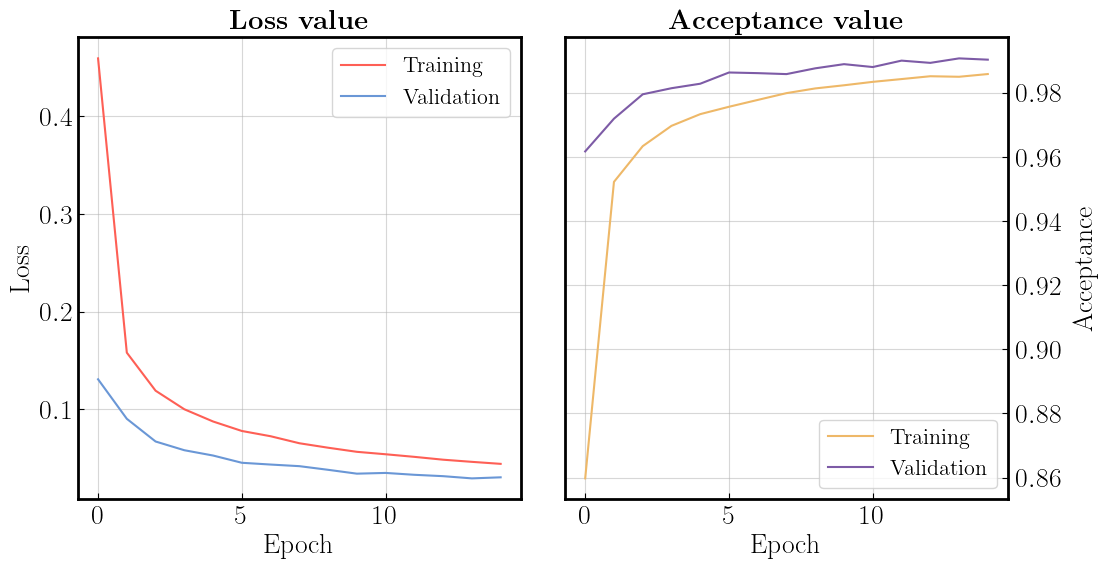

In [19]:
# Evaluate the model
score = CNN.evaluate(x_test, y_test, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

# plot
fig, axs = plt.subplots(1, 2, figsize=(12,6), gridspec_kw={'hspace': 0.1, 'wspace': 0.1})

axs[0].plot(history_CNN.history['loss'], c='#FE5F55', label='Training')
axs[0].plot(history_CNN.history['val_loss'], c='#6A97D6', label='Validation')
axs[1].plot(history_CNN.history['acc'], c='#EEB868', label='Training')
axs[1].plot(history_CNN.history['val_acc'], c='#7D5BA6', label='Validation')

axs[0].set_ylabel('Loss')
axs[1].set_ylabel('Acceptance', labelpad=8)
axs[1].yaxis.set_label_position('right')
axs[1].yaxis.set_tick_params(pad=6, left=False, right=True, labelleft=False, labelright=True)

axs[0].set_title(r'\textbf{Loss value}')
axs[1].set_title(r'\textbf{Acceptance value}')
axs[0].legend(fontsize=16)
axs[1].legend(fontsize=16)
axs[0].set_xlabel('Epoch')
axs[1].set_xlabel('Epoch')

plt.show()

# Exercise 12.3

Use the `gimp` application to create 10 pictures of your "handwritten" digits, import them in your jupyter-notebook and try to see if your CNN is able to recognize your handwritten digits.

In [20]:
# load the data from the Images folder
directory = "./Images"
data = []
labels = []

# cycle over all files in the directory
for filename in os.listdir(directory):
	# Construct the full file path
	if filename.endswith('.DS_Store') :
		continue
	file_path = os.path.join(directory, filename)
	
	# open the image and process it
	digit_in = Image.open(file_path).convert('L')
	rows, cols = digit_in.size
	
	pix = digit_in.load()
	values = np.zeros((rows, cols))
	for j in range(cols):
		for i in range(rows):
			values[i, j] = pix[j, i]
	
	values /= 255
	data.append(values)

	# Extract the digit from the filename and append to labels
	digit = int(filename[0])
	labels.append(digit)


size_data = len(data)


1/1 [==============================] - 0s 15ms/step


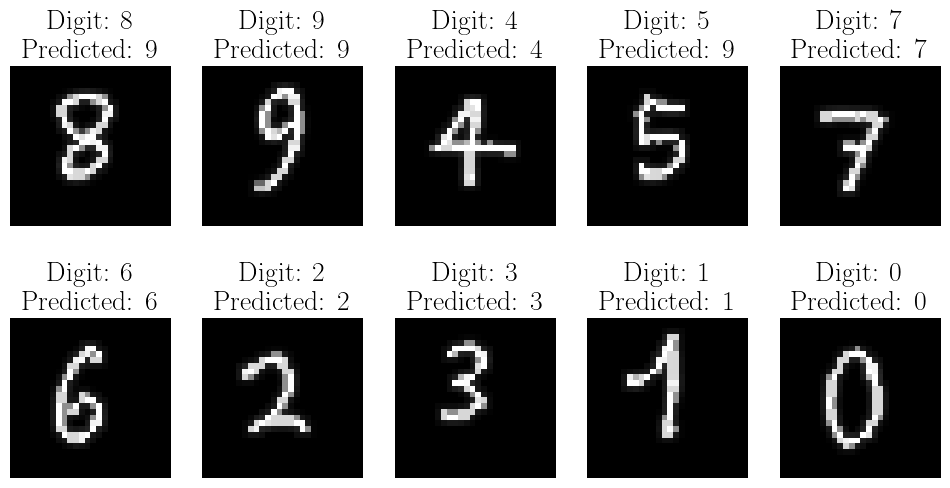

In [21]:
plt.figure(figsize=(12, 6))

for d, dat in enumerate(data):
   # reshape data for prediction 
   dat = dat.reshape(1, rows, cols, 1)
   prediction = CNN.predict(dat)
   # Reshape data for plotting
   dat = dat.reshape(rows, cols)

   ax = plt.subplot(2, 5, d + 1)
   plt.imshow(dat, cmap='gray')
   plt.title('Digit: '+str(labels[d])+ '\nPredicted: ' +str(np.argmax(prediction)))
   plt.axis('off')

plt.show()